In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('stylesheet.mplstyle')

# Set color variables to make colors easier later
pink = '#ff6150'

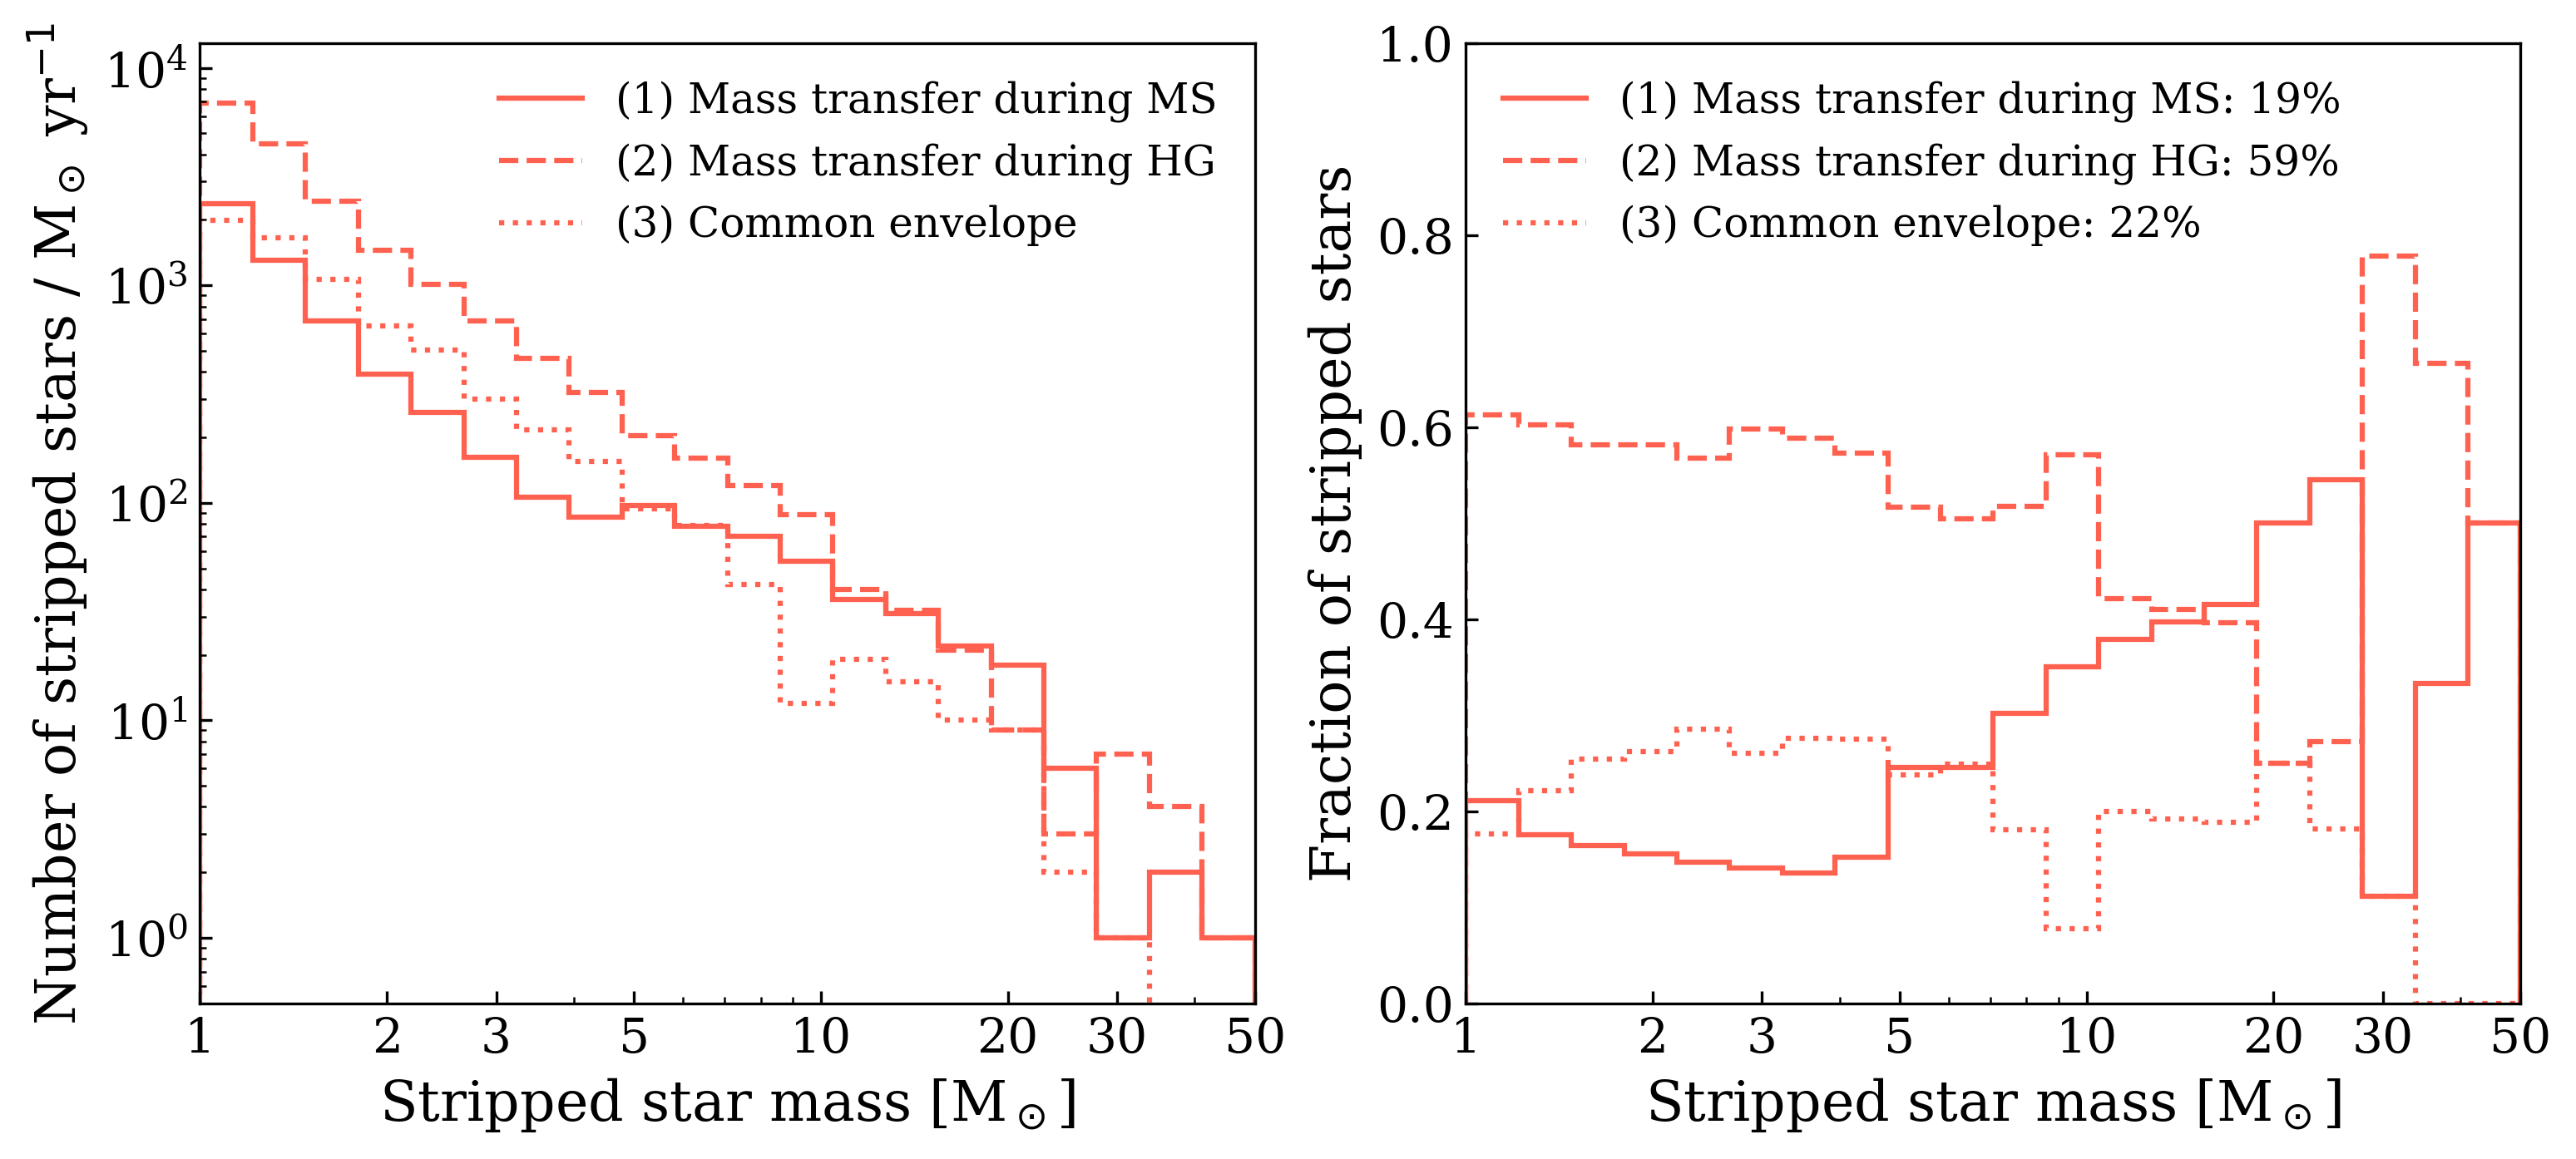

In [5]:
nbin = 20
bins = np.geomspace(1, 50, nbin)

bin_edges = np.geomspace(1, 50, nbin+1)
binwidths = bin_edges[1:] - bin_edges[:-1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# load file
df = pd.read_csv(f'../data/population_synthesis_runs/Z014/data1_Z014_00_1000000000yrs.txt', skiprows=39, sep=',')

#### LEFT SIDE ##############################################################
# make the histogram
in_bin = np.array([list((df['star_mass_1'] > bin_edge)*(df['star_mass_1'] < bin_edges[i+1])) for i, bin_edge in enumerate(bin_edges[:-1])])
hist_n = np.sum(in_bin, axis=1)
# divide into different formation channels
caseA = (df['Evolution'] == 'strip_RLOF_MS')
caseB = (df['Evolution'] == 'strip_RLOF_HG')
cee = (df['Evolution'] == 'strip_CEE_HG')
caseA_in_bin = np.array([this_bin * caseA for this_bin in in_bin])
caseB_in_bin = np.array([this_bin * caseB for this_bin in in_bin])
cee_in_bin = np.array([this_bin * cee for this_bin in in_bin])
caseA_means = np.sum(caseA_in_bin, axis=1)
caseB_means = np.sum(caseB_in_bin, axis=1)
cee_means = np.sum(cee_in_bin, axis=1)
# plot the data
ax[0].stairs(caseA_means, bin_edges, color=pink, lw=1.5, label='(1) Mass transfer during MS')
ax[0].stairs(caseB_means, bin_edges, color=pink, lw=1.5, ls='--', label='(2) Mass transfer during HG')
ax[0].stairs(cee_means, bin_edges, color=pink, lw=1.5, ls=':', label='(3) Common envelope') 
# ax[i][j].stairs(caseA_means+caseB_means+cee_means, bin_edges, color='k', lw=1.5) # this line is for testing with the total. comment it out later

# Axis formatting for left plot
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(1, 50)
ax[0].set_ylim(0.5, 1.3e4)
ax[0].set_xticks([1, 2, 3, 5, 10, 20, 30, 50])
ax[0].legend(loc='upper right', prop={'size': 12})
# ax[0].grid(ls=':')
ax[0].set_xticklabels(['1', '2', '3', '5', '10', '20', '30', '50'])
ax[0].set_ylabel(r'Number of stripped stars / M$_\odot$ yr$^{-1}$')
ax[0].set_xlabel(r'Stripped star mass [M$_\odot$]')

#### RIGHT SIDE #############################################################
# get the fractions
bin_total = np.sum([caseA_means, caseB_means, cee_means], axis=0)
bin_total[bin_total==0] = 1
caseA_frac = caseA_means / bin_total
caseB_frac = caseB_means / bin_total
cee_frac = cee_means / bin_total
# calculate the total fractions to use in the labels
Alabel = np.sum(caseA_means) / np.sum(hist_n) * 100
Blabel = np.sum(caseB_means) / np.sum(hist_n) * 100
Clabel = np.sum(cee_means) / np.sum(hist_n) * 100
# plot the data
ax[1].stairs(caseA_frac, bin_edges, color=pink, lw=1.5, label=f'(1) Mass transfer during MS: {Alabel:.0f}%')
ax[1].stairs(caseB_frac, bin_edges, color=pink, lw=1.5, ls='--', label=f'(2) Mass transfer during HG: {Blabel:.0f}%')
ax[1].stairs(cee_frac, bin_edges, color=pink, lw=1.5, ls=':', label=f'(3) Common envelope: {Clabel:.0f}%') 

# Axis formatting for right plot
ax[1].set_xscale('log')
ax[1].set_xlim(1, 50)
ax[1].set_ylim(0, 1)
ax[1].set_xticks([1, 2, 3, 5, 10, 20, 30, 50])
ax[1].legend(loc='upper left', prop={'size': 12})
# ax[1].grid(ls=':')
ax[1].set_xticklabels(['1', '2', '3', '5', '10', '20', '30', '50'])
ax[1].set_ylabel(r'Fraction of stripped stars')
ax[1].set_xlabel(r'Stripped star mass [M$_\odot$]')

plt.savefig('appendixA_evolutionary_channels.png', bbox_inches='tight')